**Link to the challenge can be found [here](https://data-puzzles.com/challenges/spider-walk/).**

**Link to Google collab can be found [here](https://colab.research.google.com/drive/1lbD0MlsN0uUHqBjiQ3WtoIM8hde13ABc?usp=sharing).**

# Intro

**Every minute**, the spider moves at an angle taken at random **uniformly between 0 and 360degrees**, at a distance taken at random **uniformly between 0 and 2m**. 

The spider starts at coordinates (0, 0) and my place can be represented by the area determined by the square delimited by upper-left corner (10, 10) and lower-right corner (15, 6) (unit is meter)

What's the probability the spider is at my place after 240mn?

# Solve

In [5]:
import numpy as np
import math

N_MINUTES = 240

UPPER_LEFT_CORNER = (10, 10)
LOWER_RIGHT_CORNER = (15, 6)

# def get_probability():
#     # Your turn! Can you figure out how to get this?
#     # When you have the probability, go back and write your answer in the input!

#     return 



# Attempt

This is a classic random walk simulation.

Idea: simulate a 360-degree random walk for many iterations in coordinates. Determine if spider is in location.

In [8]:
import numpy as np

In [9]:
def simulate_random_walk(n):
    x_coord = 0
    y_coord = 0

    for _ in range(n):
        angle = np.random.uniform(0, 2*math.pi)
        r = np.random.uniform(0, 2)

        x_coord += r*math.cos(angle)
        y_coord += r*math.sin(angle)

    return x_coord, y_coord

In [10]:
def is_within_square(x_coord, y_coord, upper_left_corner, lower_right_corder):
    return (
        (x_coord >= upper_left_corner[0] and x_coord <= lower_right_corder[0]) and 
        (y_coord >= lower_right_corder[1] and y_coord <= upper_left_corner[1])
    )

In [11]:
def run_simulations(n_sim, n):
    locations = []
    for _ in range(n_sim):
        final_x, final_y = simulate_random_walk(n)
        locations.append((final_x, final_y))

    return locations

In [12]:
def get_probability(n_sim = 10000):

    locations = run_simulations(n_sim, N_MINUTES)
    successes = sum([is_within_square(x_coord, y_coord, UPPER_LEFT_CORNER, LOWER_RIGHT_CORNER) for x_coord, y_coord in locations])

    return locations, successes

In [13]:
n_sim = 10000
np.random.seed(42) # for reproducibility
locations, successes = get_probability()

In [14]:
print(f"Number of Successes: {successes}. Success Rate: {successes/n_sim}")

Number of Successes: 89. Success Rate: 0.0089


In [15]:
import matplotlib.pyplot as plt

In [16]:
x, y = zip(*locations)

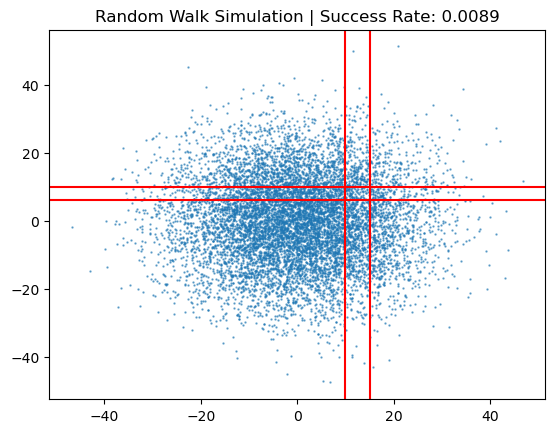

In [17]:
plt.scatter(x, y, alpha = 0.6, s = 0.5)
plt.axvline(x = 10, color = 'r')
plt.axvline(x = 15, color = 'r')
plt.axhline(y = 6, color = 'r')
plt.axhline(y = 10, color = 'r')
plt.title(f"Random Walk Simulation | Success Rate: {successes/n_sim}")
plt.show()

The success rate is around 0.89% (so less than 1%). Note this is a simulation, so we expect some error. However, 